# Classification - Supervised Machine Learning
## Banking Churn Analysis - MySQL Workbench

<div align="center">
  <img src="https://www.shutterstock.com/shutterstock/photos/574713295/display_1500/stock-photo-bank-building-574713295.jpg" alt="Image Description" width="300" height="200">
</div>

## Problem Statement:
Despite ongoing efforts by banks to attract and retain customers, the banking sector grapples with a persistent challenge in the form of customer churn. This phenomenon results in financial losses and diminished customer satisfaction.
It is beneficial for banks to comprehend the factors influencing a client's decision to part ways with the institution.

## Project Objective:
1. The primary goal of this project is to scrutinize the customer churn rate in the banking sector to gain insights into the reasons behind customer departures.
2. Following the analysis, our objective is to develop a Machine Learning Model capable of identifying key factors that significantly impact customer churn or attrition.
3. Ultimately, we aim to select the most dependable model that assigns a probability to churn, facilitating targeted customer service efforts to minimize the resources required for preventing customer churn.

## Project Overview:
1. Churn refers to customers leaving a bank or discontinuing their banking services.
2. Banking Churn Analysis involves studying customer behavior in the banking industry to predict and understand customer attrition or churn.
3. Banking Churn Modeling seeks to identify patterns and factors contributing to customer churn, empowering banks to proactively retain customers and enhance overall customer satisfaction.

## Attributes Description:
1. Number: It is likely a unique identifier for each record and does not contribute directly to the analysis.
2. CustomerId: It can be used to track and differentiate individual customers within the dataset.
3. Surname: It provides information about the family name of each customer.
4. CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
5. Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6. Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
7. Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8. Tenure: It typically represents the number of years or months the customer has been associated with the bank.
9. Balance: It reflects the amount of money in the customer's bank account at a specific point in time.
10. NumOfProducts: It can include various offerings such as savings accounts, loans, credit cards, etc.
11. HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12. IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13. EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
14. Exited: It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

## Agenda:
1. Importing Dependencies
2. Importing & Loading Data from MySQL Workbentch to Python
3. Basic Information about data
4. Data Wrangling.
    * Data Cleaning.
    * Handling Missing Values.
    * Handling Inconsistances.
5. Exploratory Data Analysis (EDA)
    * Visualizing Dependent Variable.
    * Visualizing Independent Variables.
    * Generating Insights.
6. Feature Engineering
7. Data Preprocessing.
    * Variable Selection and Importance.
    * Feature Transformation , Scaling and Encoding.
    * Splitting Data for Model Training.
    * Applying SMOTE to reduce class-imbalance.
8. Model Creation, Training and Evaluation.
    * Selection of Classification Algorithms.
    * Model Training and Tuning.
    * Model Evaluation and Performance.
    * Confusion Matrix Analysis.
    * Accuracy, Precision, Recall, and F1 Score.
    * Receiver Operating Characteristic (ROC) Curve and AUC.
    * Feature Importance and Contribution.
9. Conclusion and Recommendations

## 1. Importing Dependencies

In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

## 2. Importing & Loading Data from MySQL Workbentch to Python

In [3]:
import pandas as pd
import mysql.connector as mysql

# Connect to the MySQL database
db = mysql.connect(
    host="localhost",
    user="root",
    password="12345",
    database="bank"
)

# Create a cursor
cursor = db.cursor()

# Replace 'your_table_name' with your actual table name
table_name = 'churn'

# Execute a SELECT query to retrieve the entire data from the table
query = f"SELECT * FROM `{table_name}`"
cursor.execute(query)

# Fetch all the rows from the last executed statement
table_data = cursor.fetchall()

# Get column names from the cursor description
columns = [i[0] for i in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(table_data, columns=columns)


In [4]:
# Display the DataFrame
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5275,5276,15579616,Goodwin,683,France,Female,42,8,0.00,2,0,1,198134.90,0
5625,5626,15663234,Bishop,508,France,Female,60,7,143262.04,1,1,1,129562.74,0
7378,7379,15641715,Ts'ui,599,France,Male,34,8,0.00,2,1,1,174196.68,0
6572,6573,15574237,Hsueh,588,France,Female,21,8,0.00,2,1,1,110114.19,0
3450,3451,15661936,Chikelu,513,France,Male,40,3,141004.46,1,1,0,105028.46,0


## 3. Basic Information About Data

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### Observation:
1. There is total 10000 records and 14 columns availabe in the dataset.
2. Out of 14 columns there are 11 numerical columns and 3 categorical columns.

### Columns

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Checking Missing Values

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Observations:
There are no missing values. So we don't have to perform Data Imputation.

### Checking Duplicates

In [9]:
df.duplicated().sum()

0

##### Observations:
There are no duplicates. So, there is no Data Lekage.

### Statistical Description on Categorical Features

In [10]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


##### Obsevations:
1. Surname column is having very high cardinality and not relevant for predicting customer churned or not. So we can simply drop this feature.
2. Geography & Gender Columns are having low cardinality and seems relevant for predicting customer churned or not.

## 4. Data Wrangling - Data Cleaning + Data Transformation

In [11]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
561,562,15800440,Power,650,Spain,Male,61,1,152968.73,1,0,1,82970.69,0
5901,5902,15712930,Duncan,587,France,Male,42,1,0.00,1,0,0,123006.91,0
8514,8515,15796071,Loane,657,Spain,Male,29,7,83889.03,1,1,0,153059.62,0
2326,2327,15762984,McIntosh,648,Spain,Male,35,7,0.00,2,0,0,122899.01,0
4662,4663,15749528,Achebe,652,Spain,Male,58,6,0.00,2,0,1,170025.43,0


##### Observations:
1. RowNumber and CustomerId columns represents a unique value for each customer and doesn't seem relevant for predicting customer churned or not.
2. Surname column is having high cardinality* and **doesn't seems relevant for predicting customer churned or not.
3. Hence we can drop these features.

In [12]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

### Renaming Target Variable and its values 

In [13]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [14]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [15]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,Yes
8724,668,Spain,Female,30,8,0.00,2,1,0,138465.70,No
2901,498,France,Male,73,2,170241.70,2,1,1,165407.96,No
2779,733,Germany,Male,38,9,111347.37,2,0,1,194872.97,No
6737,715,Spain,Male,38,2,96798.79,2,1,1,4554.67,No


## 5. Exploratory Data Analysis (EDA)

#### Target Variable

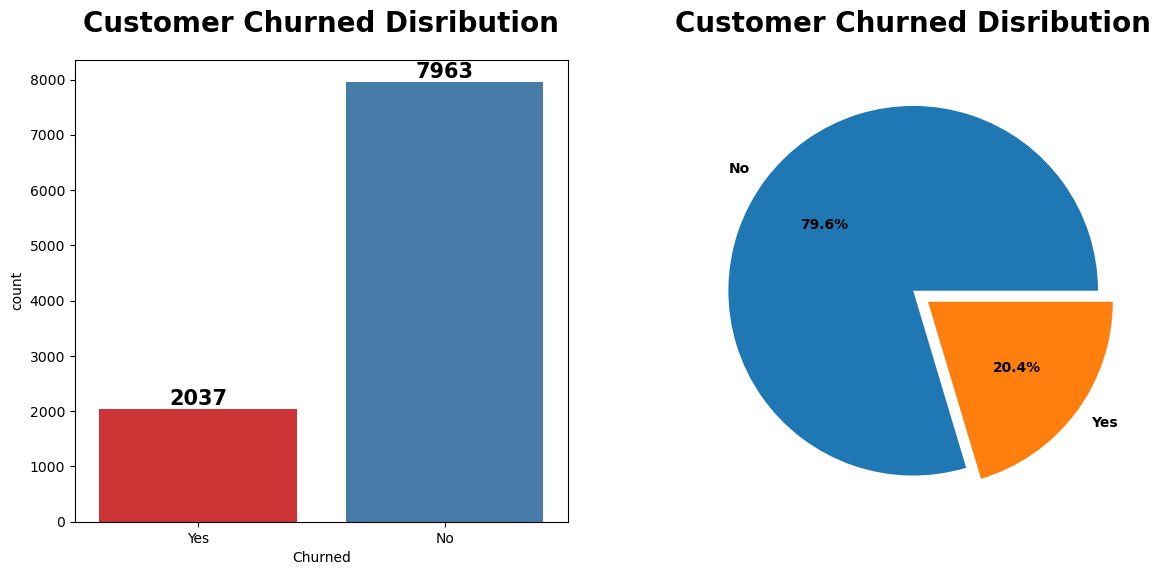

In [16]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set1")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set1"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

##### Observations:
1. There is class-imbalance which can lead to bias in model performance.
2. So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

#### Customer Churned by Gender

In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set1")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

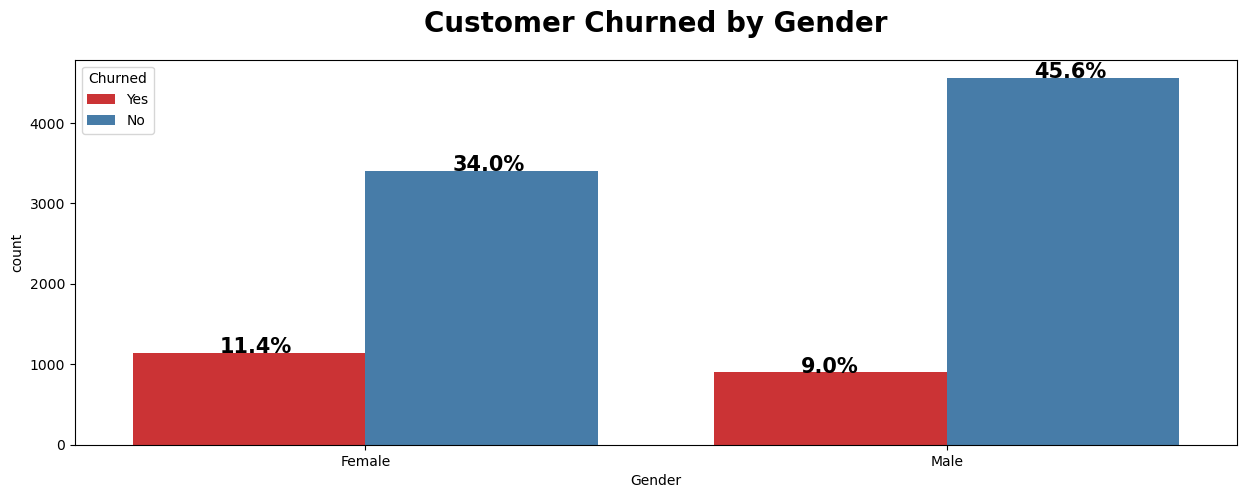

In [18]:
countplot("Gender")

###### Observations:
1. The churned probabillity is more for Feamle Customers compared to male customers.
2. Which means female customers are more deactivating their banking facilities compared to male customers.

##### Recommendations:
1. Bank can Develop targeted marketing campaigns specifically tailored to female customers.
2. Bank can Focus on enhancing the overall customer experience for female customers.

#### Customer Churned by Geoprahical Region

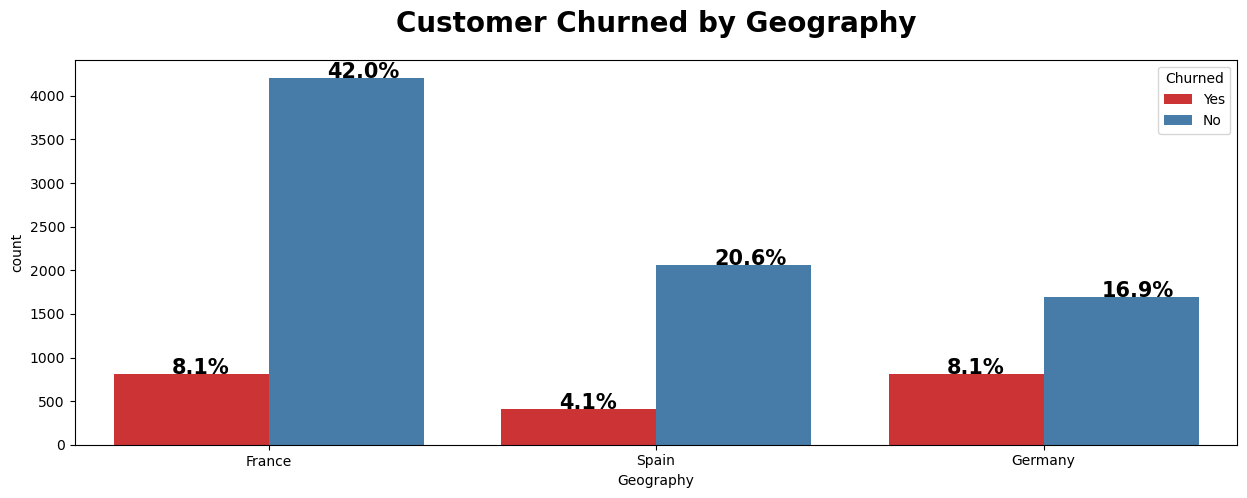

In [19]:
countplot("Geography")

##### Observations:
1. Half of the customers are from France followed by Germany and Spain.
2. Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.
3. There are almost equal customers from Spain & Germany, but the Churn rate is almost double in Germany when compared with spain.

##### Recommendation:
1. Bank can analyze the banking facilites & behaviour of customers from france and try to implement those on Germany customers.

#### Customer Churn by "HasCrCard"

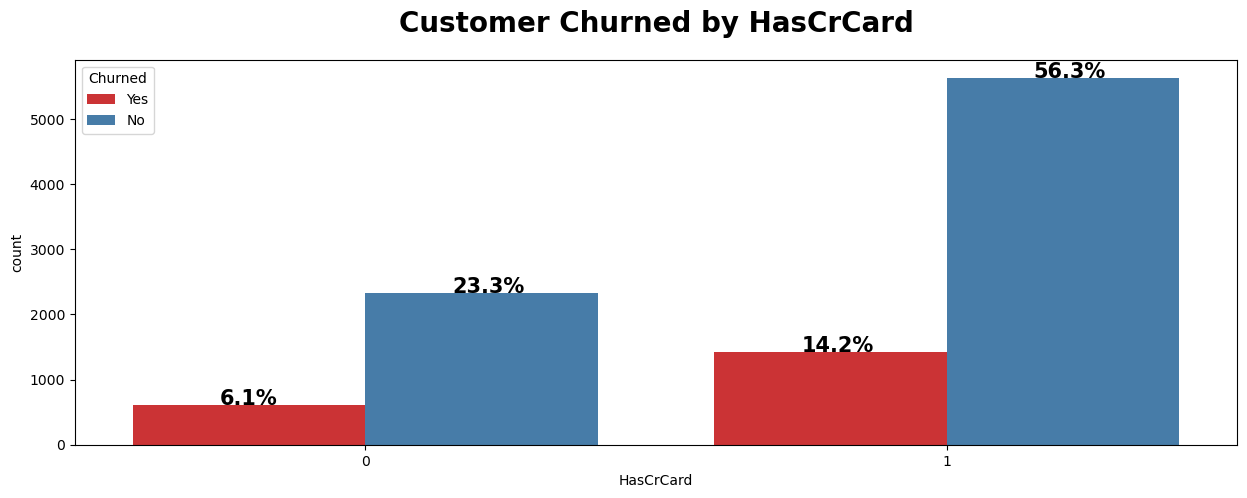

In [20]:
countplot("HasCrCard")

##### Observations:
1. More than 70% of customers are having credit card.
2. The churn probability value for the both the categories is almost 1:4.
3. So credit card is not affecting the churn of customers.

#### Customer Churned by "NumOfProducts"

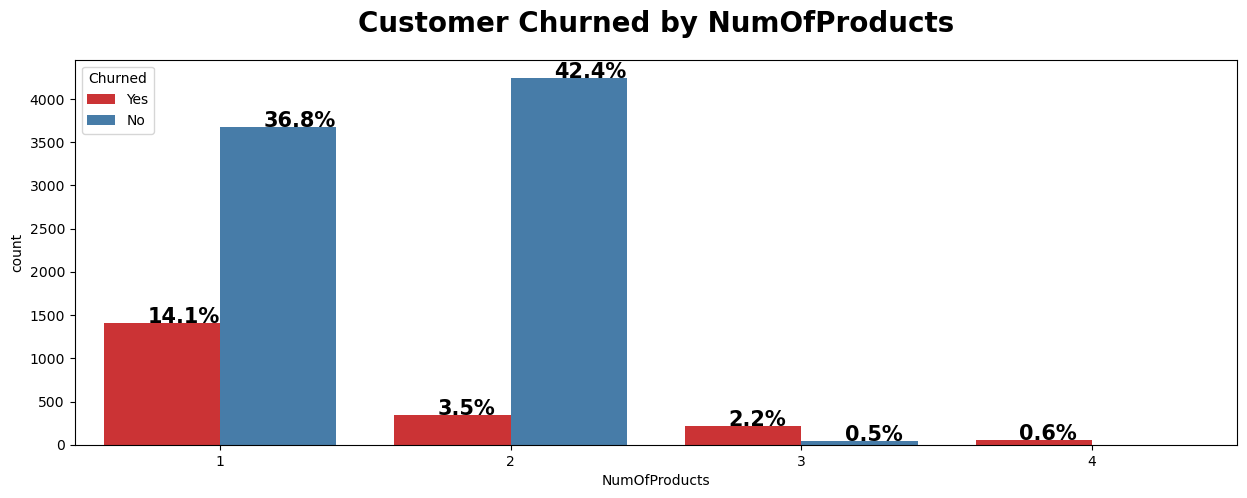

In [21]:
countplot("NumOfProducts")

##### Observations:
1. Most of the customers are having either 1 or 2 total number of banking products.
2. Very few customers are having more than 2 total number of banking products.
3. The lowest churn rate is with customers having only 2 products.
4. There is very high churn rate in customers having 1 product or more than 2 products.

##### Note:
1. We can do feature engineering by grouping the customers having products more than 2 together to reduce the class imbalance.
2. Because Class Imbalance leads to bias in model and misrepresentation of minority class.

##### Recommendations:
1. The bank can try to convince the customers to have atleast 2 banking products.
2. They can provide Rewards and Incentives to the customers having atleast 2 banking products.

#### Customer Churned by "IsActiveMember"

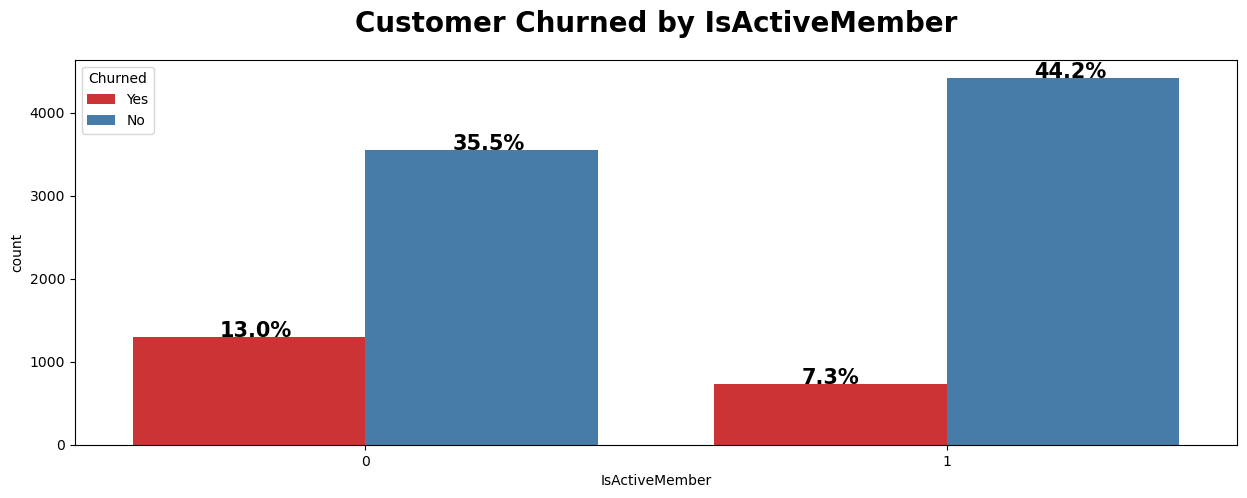

In [22]:
countplot("IsActiveMember")

##### Observations:
1. There is approxiamately equal customer who are either active or not active.
2. But the churn rate % in not active customers is almost double compared to active customers.
3. So customers which are not active are morely likely to deactivate their banking facilities.

##### Recommendation:
1. Bank can provide Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

#### Customer Churned by "Tenure"

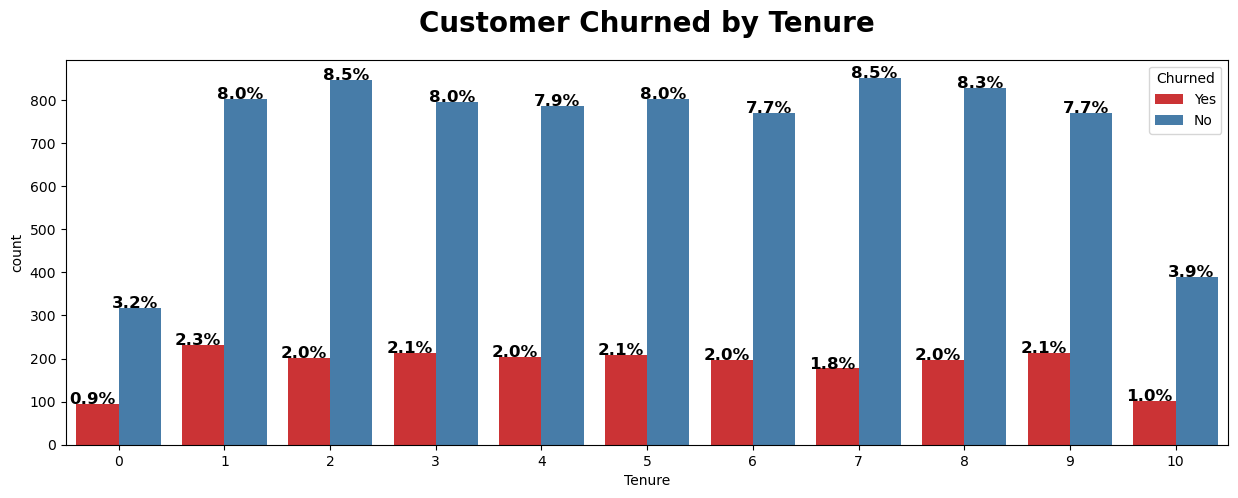

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set1")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

##### Observations:
1. Since there is almost similar distribution of churn status we can't make any specific inference.

#### Customer Churned by "CreditScore"

In [24]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set1")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["Churned"],df[column],palette="Set1")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

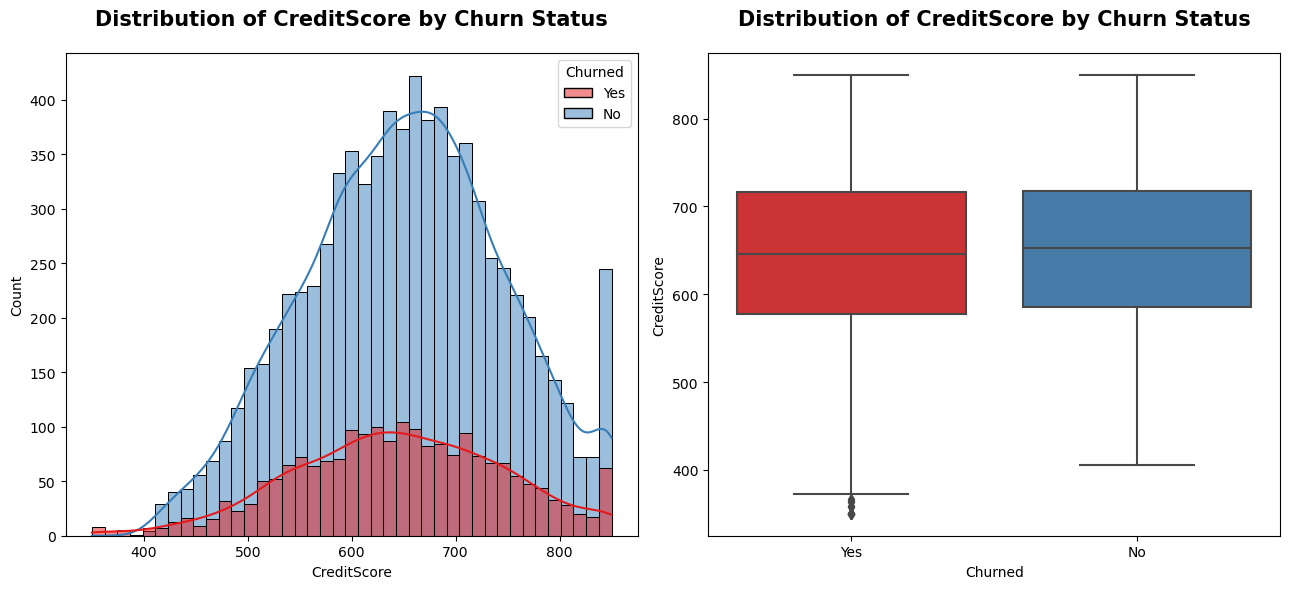

In [25]:
continous_plot("CreditScore")

##### Observations:
1. The Median CreditScore of both churned and not churned customers are approxiamately equal.
2. Since the values are approximately equal for both churn status we can't generate any relevant inference.

#### Customer Churned by "Age"

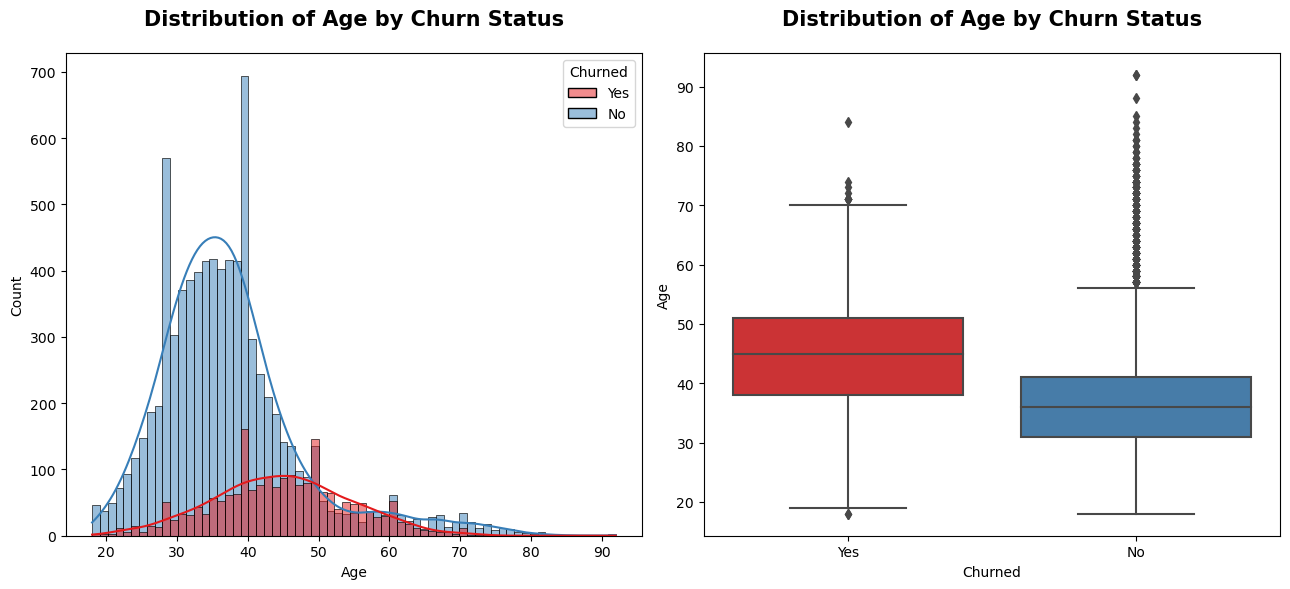

In [26]:
continous_plot("Age")

##### Observations:
1. The distribution is right skewed because of presence of outliers which can lead to overfitting in model.
2. To overcome this right-skewed distribution we can use log normal transformation technique to bring a normal distribution.

#### Customer Churned by "Balance"

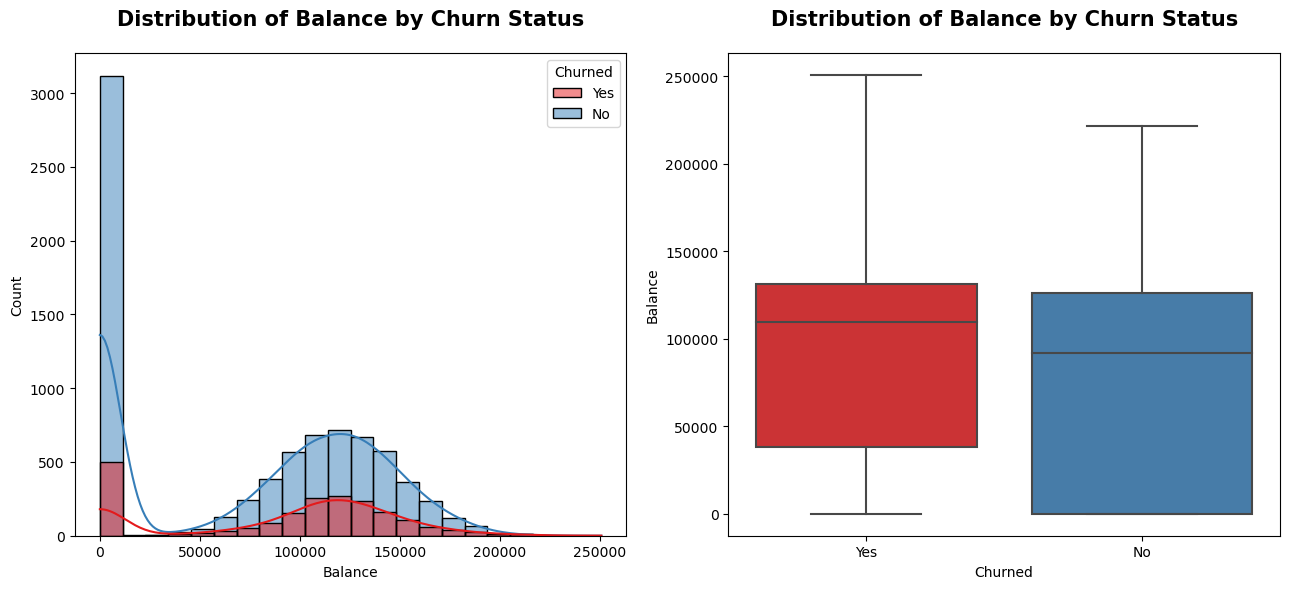

In [27]:
continous_plot("Balance")

##### Observations:
1. More than 3000 customers are having their account balance equal to zero.
2. Customers with zero balance are more likely to deactivate their account.
3. Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.

##### Note:-
1. We can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately.

#### Customer Churned by "Estimated Salary"

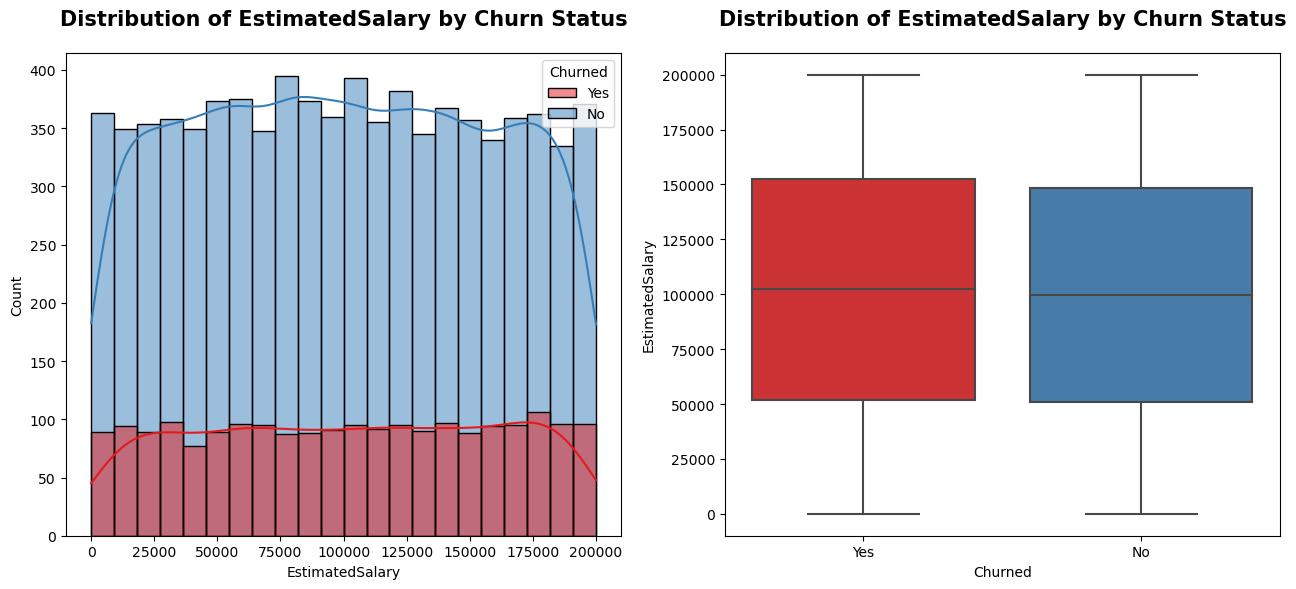

In [28]:
continous_plot("EstimatedSalary")

##### Observations:
1. The median value of EstimatedSalary is approxiamately same for both the churned categories.
2. Since the distribution is kind of similar for both churn category we can't make any relevant inference.

## 6. Feature Engineering

#### Creating New Feature From "NumOfProducts" Feature

In [29]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [30]:
df["Total_Products"] = np.select(conditions,values)

In [31]:
df.drop(columns="NumOfProducts", inplace=True)

#### Feature "Total_Products".

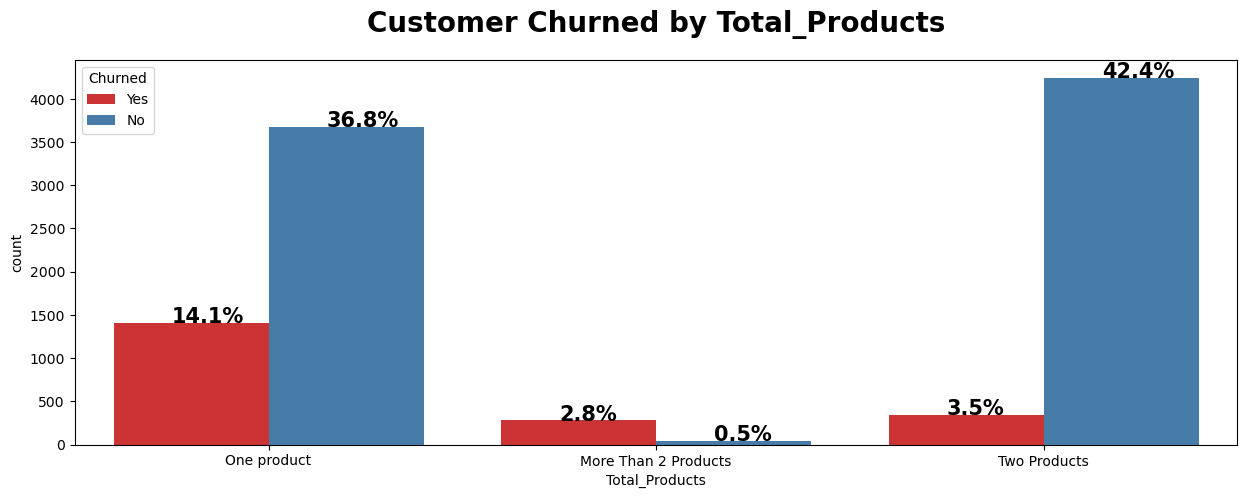

In [32]:
countplot("Total_Products")

#### Creating New Feature From "Balance" Feature

In [33]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [34]:
df["Account_Balance"] = np.select(conditions, values)

In [35]:
df.drop(columns="Balance",inplace=True)

#### Feature "Account_Balance".

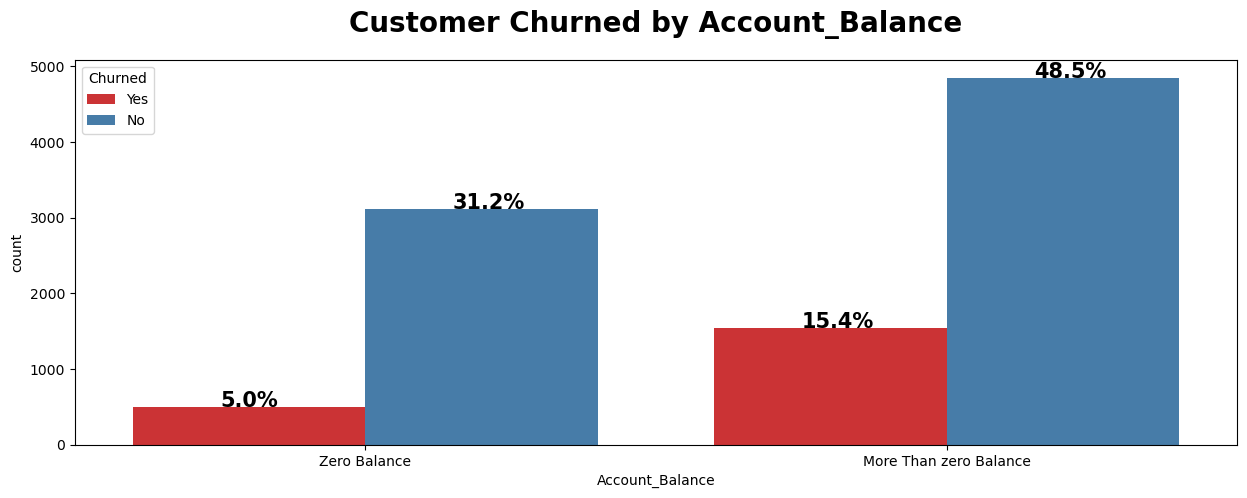

In [36]:
countplot("Account_Balance")

## 7. Data Preprocessing

#### Computing Unique Values of Categorical Columns

In [37]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



#### Performing One Hot Encoding on Categorical Features

In [38]:
df = pd.get_dummies(columns=cat_cols, data=df)

#### Encoding Target Variable

In [39]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [40]:
df.sample(5)

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
845,505,49,7,0,0,135180.11,0,1,0,0,0,1,0,1,0,1,0
2554,756,30,2,0,0,7554.68,0,0,0,1,0,1,0,1,0,1,0
1435,598,44,8,1,0,148487.90,0,0,0,1,0,1,0,0,1,0,1
690,716,27,1,1,0,67611.36,0,0,1,0,0,1,0,0,1,1,0
8173,757,31,1,1,0,163170.32,0,0,1,0,0,1,1,0,0,1,0


#### Checking Skewness of Continous Features

In [41]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [42]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


##### Observations:
1. Age Feature is highly right-skewed , which conveys that there is presence of positive outliers.
2. Skewness can negatively impact the performance of certain machine learning algorithms, like DecisionTree & Linear Models.
3. To overcome the right-skewed distribution we can use log normal transformation to achieve a normal distribution.

#### Performing Log Transformation on Age Column

In [43]:
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.

In [44]:
df["Age"] = np.log(df["Age"])

#### Visualizing Age Before and After Transformation

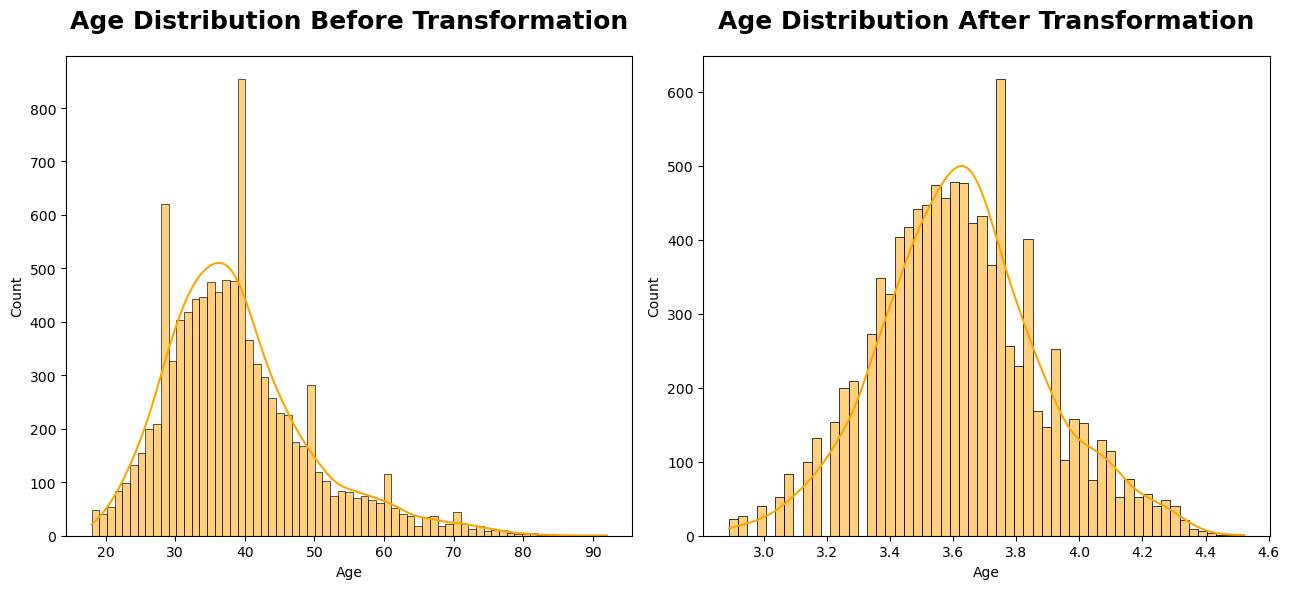

In [45]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="orange", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="orange", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

##### Observations:
1. After applying log normal transformation the age feature has achieved a normal distribution.
2. This will help model to find more relevant patterns and build a more accurate model.

#### Segregating Features & Labels for Model Training

In [46]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

#### Splitting Data For Model Training & Testing

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


##### Observations:
1. Data is equally splitted for Model Training & Testing.
2. So we can build a Predictive Model to find the key factors that are significantly influencing customers churn.

#### Applying SMOTE to Overcome the Class-Imbalance in Target Variable

In [49]:
smt = SMOTE(random_state=42)

In [50]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [51]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [52]:
y_train_resampled.value_counts().to_frame()

,Churned
0,6368
1,6368


##### Observations:
1. Both the categories in Target variable are now having equal number of records.
2. So we can train the Model pn balanced records for both churn categories and make a predictive model with low bias.

## Decision Tree

#### Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [55]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

#### Fetching the Best Parameters for DecisionTree Model.

In [56]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'random_state': 42,
 'splitter': 'random'}

#### Creating DecisionTree Model Using Best Parameters.

In [57]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=8, min_samples_split=7, random_state=42,
                       splitter='random')

#### Computing Model Accuracy.

In [58]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.51 %
Accuracy Score of Model on Testing Data  is => 84.3 %


#### Model Evaluation using Different Metric Values.

In [59]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.843
Recall Score of the Model is => 0.843
Precision Score of the Model is => 0.843


##### Observations:
1. We can observe that recall, precision, and F1 score are all the same, it means that our** model is achieving perfect balance between** correctly identifying positive samples (recall) and minimizing false positives (precision).
2. The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

#### Finding Importance of Features in DecisionTreeClassifier.

In [60]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

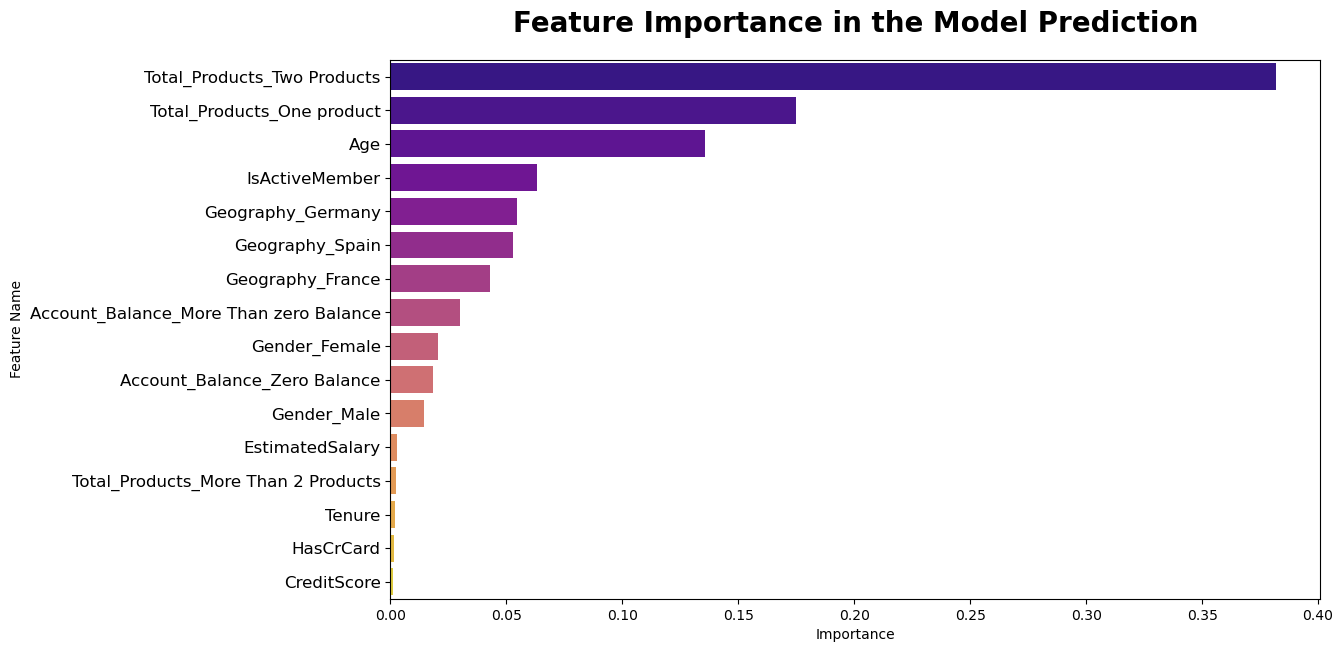

In [61]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

##### Observations:
1. We can observe that recall, precision, and F1 score are all the same, it means that our** model is achieving perfect balance between** correctly identifying positive samples (recall) and minimizing false positives (precision).
2. The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

#### Model Evaluation using Confusion Matrix.

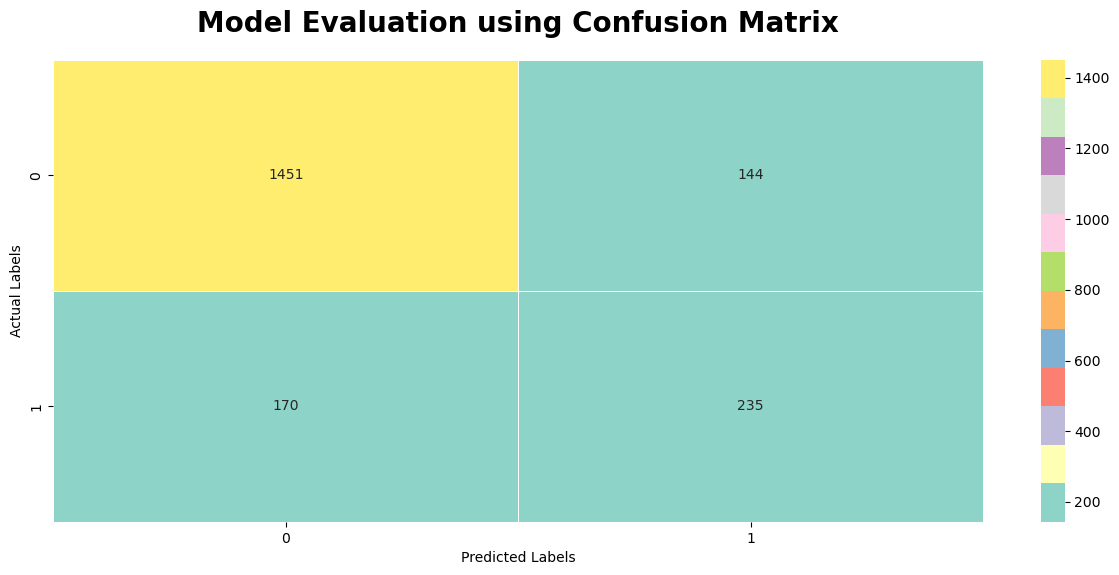

In [62]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set3")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

##### Observations:
1. Strong True Positive Rate: The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.
2. Need of Improvement in False Negative Rate: The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

####  Model Evaluation: ROC Curve and Area Under the Curve (AUC)

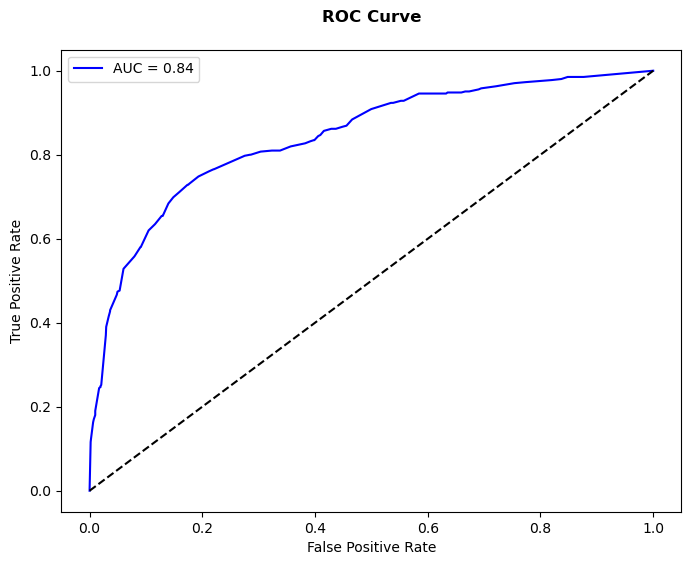

In [63]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

##### Observations:
1. An AUC (Area Under the Curve) value of 0.84 suggests that the model has strong discriminative power.
2. This suggests that the model has a high ability to distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.
3. The model has a relatively high probability of ranking a randomly selected positive instance higher than a randomly selected negative instance.

## Random Forest

#### Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [64]:
rfc = RandomForestClassifier()

In [65]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

#### Fetching the Best Parameters for RandomForest Model.

In [ ]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

#### Creating RandomForest Model Using Best Parameters.

In [ ]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

#### Computing Model Accuracy.

In [ ]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

#### Model Evaluation using Different Metric Values.

In [ ]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

#### Observations:
1. We can observe that recall, precision, and F1 score are all the same, it means that our** model is achieving perfect balance between** correctly identifying positive samples (recall) and minimizing false positives (precision).
2. The high values for F1 score, recall score, and precision score, all of which are approximately 0.8. These metrics suggest that the model achieves good accuracy in predicting the positive class.

#### Finding Importance of Features in RandomForest Model.

In [ ]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

##### Observations:
1. The key factors that significantly influence the deactivation of customers banking facilities are:-
Total_Products, Age, IsActiveMember, Geography, Gende and Balance.
2. The minimal impact of features on the deactivation of customers' banking facilities are:-
HasCrCard, Tenure, CreditScore and EstimatedSalary

#### Model Evaluation using Confusion Matrix.

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set3")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

##### Observations:
1. Strong True Positive Rate: The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.
2. Need of Improvement in False Negative Rate: The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

#### Model Evaluation: ROC Curve and Area Under the Curve (AUC)

In [ ]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

##### Observations:
1. An AUC (Area Under the Curve) value of 0.86 suggests that the model has strong discriminative power.
2. This suggests that the model has a high ability to distinguish between positive and negative instances, indicating its effectiveness in making accurate predictions.
3. The model has a relatively high probability of ranking a randomly selected positive instance higher than a randomly selected negative instance.

## Conclusion:
1. The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Gender and Geography.
2. High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 85% on the testing data suggests its ability to generalize well to unseen instances.
3. High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values, all approximately 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.
4. High AUC value more than 0.8, states that the model demonstrates a reasonably good discriminatory power. It suggests that the model is able to distinguish between positive and negative instances with a relatively high degree of accuracy.
5. Overall Model Performance: The model demonstrates strong performance across multiple evaluation metrics, indicating its effectiveness in making accurate predictions and capturing the desired outcomes.

## Recommendations:
1. The bank can try to convince the customers to have atleast 2 banking products but not less than 2.
2. The bank can launch a scheme for customers with higher ages (Senior Citizens) so that they not deactivate their banking facilities.
3. The bank can provide Rewards and Incentive Programs, Regular Communication and Updates, and Enhanced Digital Services so that customers remain active to the banking facilities.

**END OF DOCUMENT**